In [74]:
# Add directory above current directory to path
import sys; sys.path.insert(0, '..')

import numpy as np

from src.chemkin_wrapper import chemkin_wrapper, plot_outputs
from src.chemkin import CHEMKIN 
from src.hychem import CONDITION, HYCHEM_A2, x_to_params, params_to_x

%reload_ext autoreload
%autoreload 2

In [75]:
# d = chemkin_wrapper("../workingdir")
# d.head()
# plot_outputs(d)

Temperature: 1300 K
Pressure: 4 atm
POSF10325: 0.004 (fraction)
AR: 0.996 (fraction)



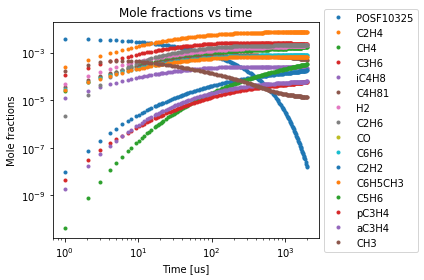

In [76]:
ck = CHEMKIN("../workingdir")
cond = CONDITION(1300, 4, {'POSF10325': .004, 'AR': .996})
print(cond)
ck.chemkin_wrapper(cond).head()
ck.plot_outputs(log="xy")

In [91]:
np.random.seed(9123)

hc = HYCHEM_A2("../data/cheminp", "../workingdir", CHEMKIN("../workingdir"))
cond = CONDITION(1300, 4, {'POSF10325': .004, 'AR': .996})
print(cond)

true_x = np.random.rand(27)
hc.write_cheminp(true_x)
true_d = hc.simulate(cond).loc[:, ["t", "POSF10325", "CH4", "C2H4", "C3H6"]]
print(true_d.head())

iter_x = np.random.rand(27)
hc.loss(iter_x, true_d, cond)**0.5
hc.grad(range(15))

Temperature: 1300 K
Pressure: 4 atm
POSF10325: 0.004 (fraction)
AR: 0.996 (fraction)

        t  POSF10325       CH4      C2H4      C3H6
0  0.0000   0.004000  0.000000  0.000000  0.000000
1  1.0850   0.003733  0.000093  0.000094  0.000190
2  2.1746   0.003501  0.000175  0.000175  0.000353
3  3.1651   0.003315  0.000244  0.000241  0.000484
4  4.1557   0.003146  0.000307  0.000301  0.000603


array([-3.71545780e-07, -2.89535509e-08, -9.58334230e-08, -7.69134704e-07,
       -2.15455454e-07,  3.71807309e-09, -1.76172299e-07, -1.52936572e-08,
        8.08391410e-07, -3.34822301e-08, -1.36830553e-06,  2.51205974e-09,
       -5.93602864e-11, -3.57201347e-09,  3.81558058e-11,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [ ]:
np.random.seed(9123)
hc = HYCHEM_A2("../data/cheminp", "../workingdir", CHEMKIN("../workingdir"))
cond = CONDITION(1300, 4, {'POSF10325': .004, 'AR': .996})

true_x = np.random.rand(27)
hc.write_cheminp(true_x)
true_d = hc.simulate(cond).loc[:, ["t", "POSF10325", "CH4", "C2H4", "C3H6"]]

iter_x = np.random.rand(27)
momentum = np.zeros_like(iter_x)

for epoch in range(10):
    alpha = 1e4/(1+epoch)**0.5  # step size
    loss = hc.loss(iter_x, true_d, cond)**0.5
    last_iter_x = iter_x.copy()
    iter_x += epoch/(epoch+3)*momentum
    for i in np.random.permutation(15):
        gi = hc.grad([i])
        iter_x -= alpha*gi
        iter_x[iter_x>1] = 1
        iter_x[iter_x<0] = 0
    momentum = iter_x - last_iter_x
    print(f"epoch {epoch} loss {loss}")

epoch 0 loss 0.0005000850560942613
epoch 1 loss 0.0007823971999645795
epoch 2 loss 0.000494845209784363
epoch 3 loss 0.00025926999801303144
epoch 4 loss 0.0002070729267948708
epoch 5 loss 0.00013237963815925606


In [123]:
print(x_to_params(iter_x))
print(x_to_params(true_x))

[ 2.00000000e+00  1.00000000e+00  4.10988035e-01  4.00000000e+00
  1.42608909e+00  9.67758400e-01  6.94000000e+26 -2.58578204e+00
  7.48773000e+04  1.32097708e+00  9.52000000e+00  1.37055296e+03
  4.88936124e-08  5.41146155e+00  7.68687268e+03  2.74580610e+09
  1.53204711e+00  7.53882759e-04  1.63420630e+14  5.06157986e-02
  4.54441104e+04  8.18588383e+03  2.78454865e+00  1.61394341e+04
  3.91532887e+01  2.75980409e+00  6.96044462e+02]
[ 8.80703557e-01  2.92799274e-01  6.24047381e-01  2.02550537e+00
  2.69569809e+00  1.44675991e-01  2.99492363e+26 -2.58521735e+00
  8.30170897e+04  1.32875008e+00  8.10227914e+00  1.31034998e+03
  4.75117884e-08  6.17075014e+00  7.90459331e+03  4.47289821e+09
  2.41635913e+00  4.87995521e-05  9.70689694e+13  1.00351196e-02
  4.79094602e+04  3.16917158e+04  2.77467114e+00  1.44470994e+04
  3.59124420e+01  3.59084401e+00  7.30698384e+02]


In [117]:
hc.grad(range(15))

array([-1.16997717e-07, -8.17751612e-08, -2.09259834e-07, -1.71993932e-07,
       -3.83013880e-08,  1.65975149e-09,  3.04943181e-08,  2.52561716e-09,
       -1.11172742e-07, -5.37554541e-10,  9.27103988e-10,  8.06648227e-11,
        4.46735403e-11, -1.58912563e-09,  5.02584355e-11,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])